In [1]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
import tables as tb

def merge(a,b):
    final = np.zeros (len(a)+len(b))
    for i in range(len(a)):
        final[2*i]   = a[i]
        final[2*i+1] = b[i]
    return final

In [2]:
db_file = '/home/andrei2/Desktop/git/saltproc/develop/saltproc/data/db_saltproc.h5'
#db_file = '/home/andrei2/Desktop/git/saltproc/test_data/tap/hardcoded/1/db_2187d.h5'

step = 3/365  # days

db = tb.open_file(db_file, mode='r')
# print(db)

sim_param = db.root.simulation_parameters
# Keff at t=0 depletion step
k_bds = np.array([x['keff_bds'][0] for x in sim_param.iterrows()])
k_bds_err = np.array([x['keff_bds'][1] for x in sim_param.iterrows()])
# Keff at t=end depletion step
k_eds = np.array([x['keff_eds'][0] for x in sim_param.iterrows()])
k_eds_err = np.array([x['keff_eds'][1] for x in sim_param.iterrows()])

days = np.array(step*np.arange(len(k_bds)))
days2 = np.arange(step, (len(k_bds)+1)*(step), step, dtype=np.float64)

db.close()



<IPython.core.display.Javascript object>


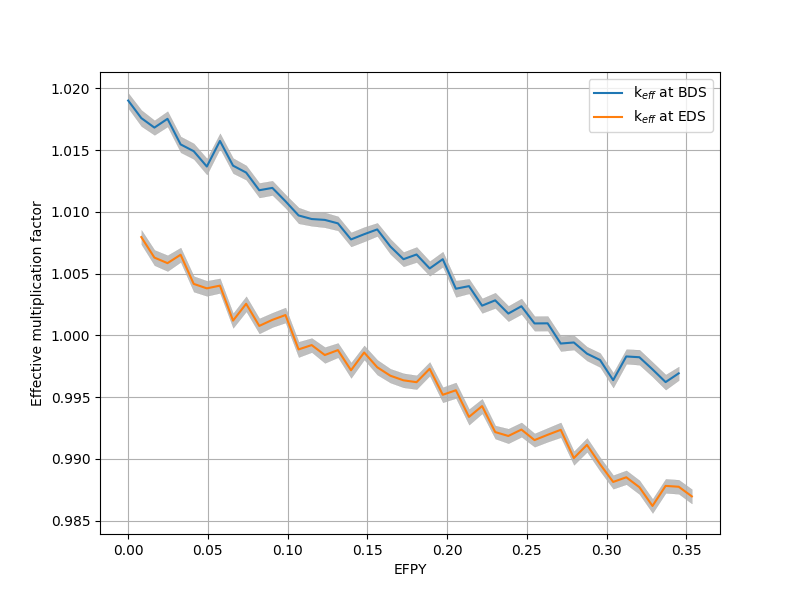

Keff drop over period 0.032035


In [3]:
# Initialize figure
fig_keff_1 = matplotlib.pyplot.figure(1, figsize=[8,6])
ax = fig_keff_1.add_subplot(111)
ax.grid(True)
ax.plot(days, k_bds, '-', label='k$_{eff}$ at BDS', linewidth=1.5)
ax.plot(days2, k_eds, '-', label='k$_{eff}$ at EDS', linewidth=1.5)

ax.fill_between(days, k_bds-k_bds_err, k_bds+k_bds_err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
ax.fill_between(days2, k_eds-k_eds_err, k_eds+k_eds_err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)

ax.legend(loc=0)
ax.set_ylabel('Effective multiplication factor')
#ax.set_xlabel('EFPD')
ax.set_xlabel('EFPY')
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
#ax.set_xlim([5830,5850])
#ax.set_ylim([1.05, 1.06])
fig_keff_1.show()
#fig_keff_1.savefig('../../../saltproc/examples/gallery/full_core/keff.png',bbox_inches='tight', dpi=700)
#fig_keff_1.savefig('/home/andrei2/Desktop/git/publications/msbr-reproc/figures/keff_rem_cases.png',bbox_inches='tight', dpi=700)
print("Keff drop over period %f" %(k_bds[0]-k_eds[-1]))

43 43
[ 0.          0.00821918  0.00821918  0.01643836  0.01643836  0.02465753
  0.02465753  0.03287671  0.03287671  0.04109589  0.04109589  0.04931507
  0.04931507  0.05753425  0.05753425  0.06575342  0.06575342  0.0739726
  0.0739726   0.08219178  0.08219178  0.09041096  0.09041096  0.09863014
  0.09863014  0.10684932  0.10684932  0.11506849  0.11506849  0.12328767
  0.12328767  0.13150685  0.13150685  0.13972603  0.13972603  0.14794521
  0.14794521  0.15616438  0.15616438  0.16438356  0.16438356  0.17260274
  0.17260274  0.18082192  0.18082192  0.1890411   0.1890411   0.19726027
  0.19726027  0.20547945  0.20547945  0.21369863  0.21369863  0.22191781
  0.22191781  0.23013699  0.23013699  0.23835616  0.23835616  0.24657534
  0.24657534  0.25479452  0.25479452  0.2630137   0.2630137   0.27123288
  0.27123288  0.27945205  0.27945205  0.28767123  0.28767123  0.29589041
  0.29589041  0.30410959  0.30410959  0.31232877  0.31232877  0.32054795
  0.32054795  0.32876712  0.32876712  0.336986

<IPython.core.display.Javascript object>


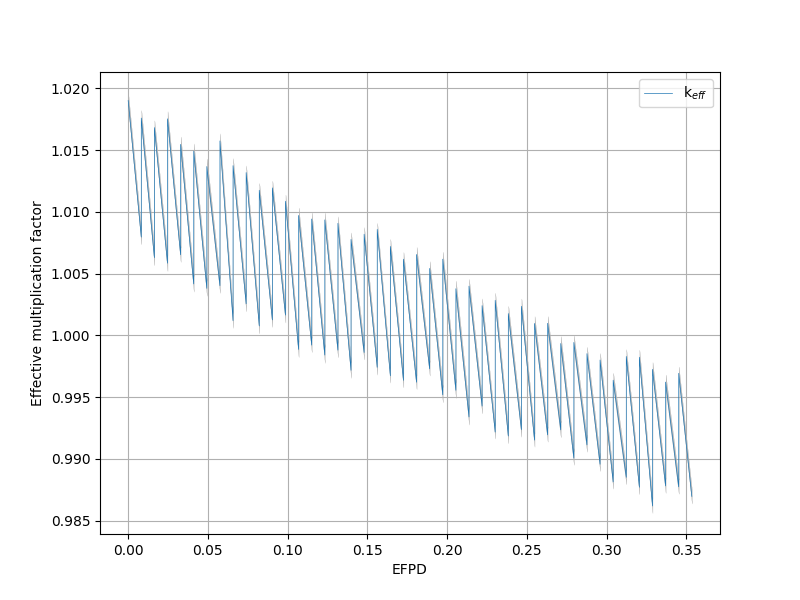

In [4]:
keff = merge(k_bds, k_eds)
efpd = merge(days, days2)
err = merge(k_bds_err, k_eds_err)


print(len(k_bds), len(k_eds))
print(efpd)
print(keff)
print(err)
# Initialize figure
fig_keff_2 = matplotlib.pyplot.figure(2, figsize=[8,6])
ax = fig_keff_2.add_subplot(111)
ax.grid(True)
ax.plot(efpd, keff, '-', label='k$_{eff}$', linewidth=0.5)

ax.fill_between(efpd, keff-err, keff+err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
#ax.fill_between(days, k_eds-k_eds_err, k_eds+k_eds_err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)

ax.legend(loc=0)
ax.set_ylabel('Effective multiplication factor')
ax.set_xlabel('EFPD')
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
#ax.set_xlim([5830,5850])
#ax.set_ylim([1.05, 1.06])
fig_keff_2.show()